In [1]:
%load_ext autoreload
%autoreload 2

In [481]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from glob import glob
from RaTag.core.wfm2read_fast import wfm2read
from RaTag.core.dataIO import load_wfm, load_alpha, iter_frames

from RaTag.alphas.wfm2spectra import alpha_peak, get_baseline, process_alpha_waveforms, alpha_peak_vectorized

# Old version

In [29]:
path = '/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/Ch4_NoSCA'
filesSca = sorted(glob(f'{path}/*.wfm'))
filesSca[:3]

['/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/Ch4_NoSCA/RUN8_20250903_Gate800_Anode2700_P8_100Wfm.wfm',
 '/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/Ch4_NoSCA/RUN8_20250903_Gate800_Anode2700_P8_101Wfm.wfm',
 '/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/Ch4_NoSCA/RUN8_20250903_Gate800_Anode2700_P8_102Wfm.wfm']

In [33]:
len(filesSca), len(peak_volts)

(300, 14400)

In [13]:
peak_volts = process_alpha_waveforms(path)

<BarContainer object of 200 artists>

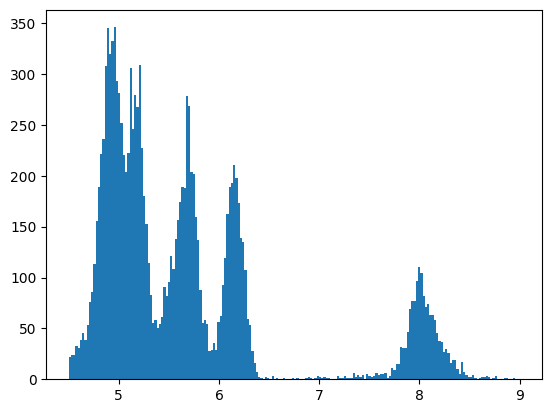

In [20]:
peak_volts_bin = peak_volts[(peak_volts > 0 ) & (peak_volts < 9)]
n, bins = np.histogram(peak_volts_bin, bins=200, range=(4.5, 9))
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.bar(bin_centers, n, width=bins[1]-bins[0])

## NoSCA

In [23]:
pathNo = '/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/Ch4_NoSCA'
filesNo = sorted(glob(f'{pathNo}/*.wfm'))
filesNo[:3]

['/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/Ch4_NoSCA/RUN8_20250903_Gate800_Anode2700_P8_100Wfm.wfm',
 '/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/Ch4_NoSCA/RUN8_20250903_Gate800_Anode2700_P8_101Wfm.wfm',
 '/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/Ch4_NoSCA/RUN8_20250903_Gate800_Anode2700_P8_102Wfm.wfm']

In [24]:
pv_no = process_alpha_waveforms(pathNo)

<BarContainer object of 100 artists>

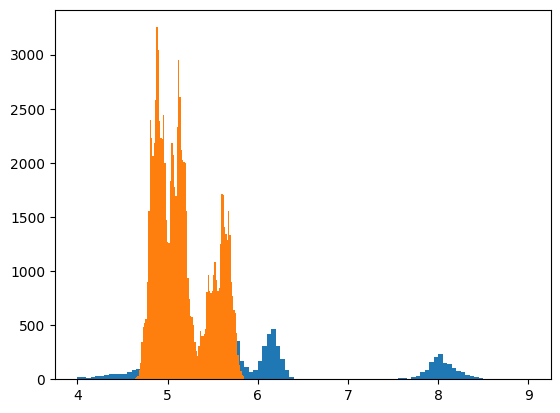

In [ ]:
# pv_no_bin = pv_no[(pv_no > 0 ) & (pv_no < 6)]
nno, binsno = np.histogram(pv_no, bins=100, range=(4, 9))
bc_no = 0.5 * (binsno[1:] + binsno[:-1])
plt.bar(bc_no, nno, width=binsno[1]-binsno[0])
plt.bar(bin_centers, n, width=bins[1]-bins[0])

## SCA 4-4.8

In [21]:
path4 = '/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/Ch4_SCA_4-4p8'
pv4 = process_alpha_waveforms(path4)

<BarContainer object of 200 artists>

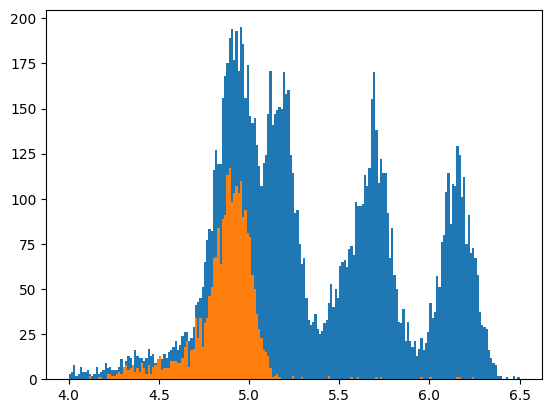

In [ ]:

nno, binsno = np.histogram(pv_no, bins=200, range=(4, 6.5))
bc_no = 0.5 * (binsno[1:] + binsno[:-1])
plt.bar(bc_no, nno, width=binsno[1]-binsno[0])

# pv4_bin = pv4[(pv4 > 0 ) & (pv4 < 6)]
n4, bins4 = np.histogram(pv4, bins=200, range=(4, 6.5))
bc_4 = 0.5 * (bins4[1:] + bins4[:-1])
plt.bar(bc_4, n4, width=bins4[1]-bins4[0]) 

In [27]:
files4 = sorted(glob(f'{path4}/*.wfm'))
i = 0
j = 0

[Text(0.5, 0, 'Time (ns)'),
 Text(0, 0.5, 'Voltage (V)'),
 Text(0.5, 1.0, 'Alpha waveform with SCA 4-4.8 MeV')]

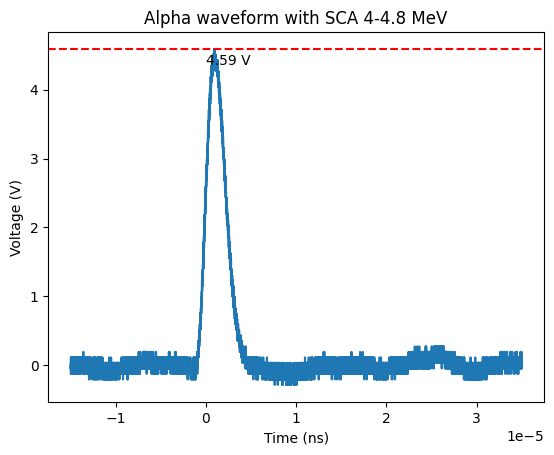

In [28]:
wf = wfm2read(files4[i])
Vm, t = wf[0], wf[1]
j -= 1
V = Vm[j]
V = V - get_baseline(V)
plt.plot(t, V)
plt.axhline(y=V.max(), color='r', linestyle='--')
plt.text(s=f'{V.max():.2f} V', x=0, y=V.max()*0.95)
plt.gca().set(xlabel='Time (ns)', ylabel='Voltage (V)', title='Alpha waveform with SCA 4-4.8 MeV')


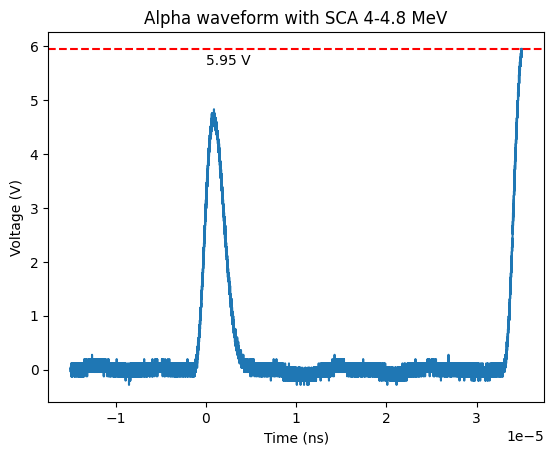

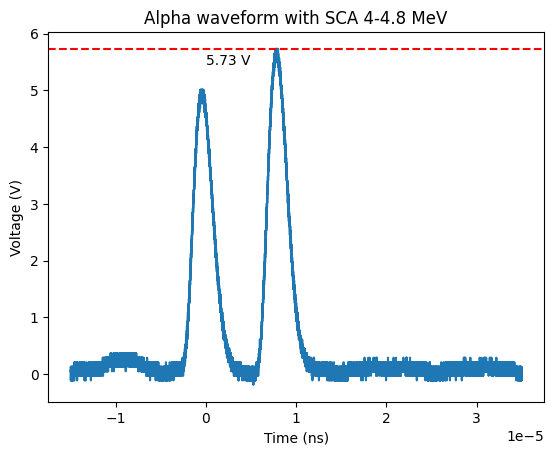

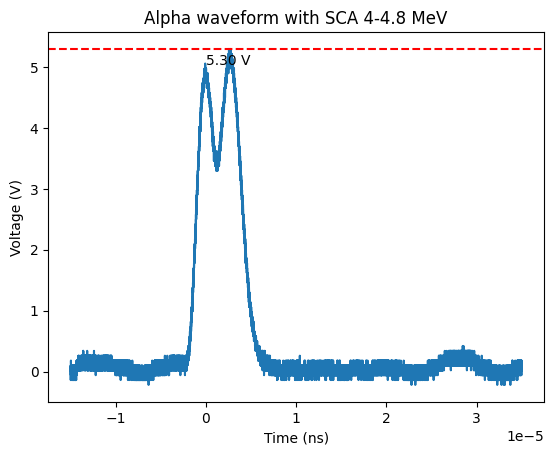

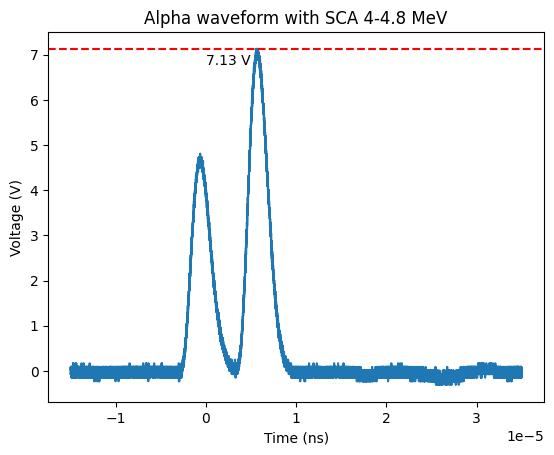

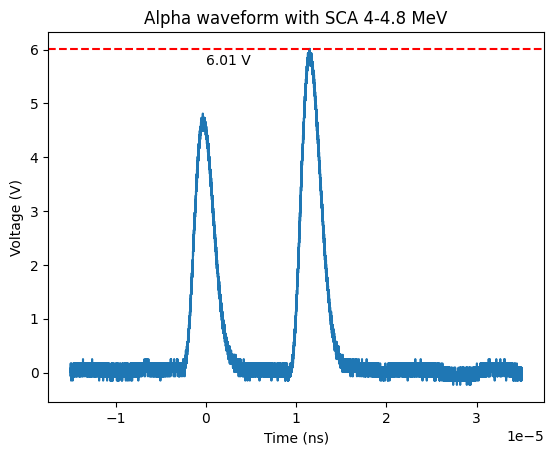

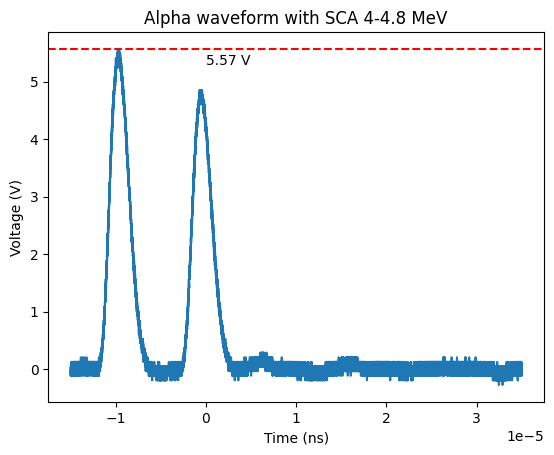

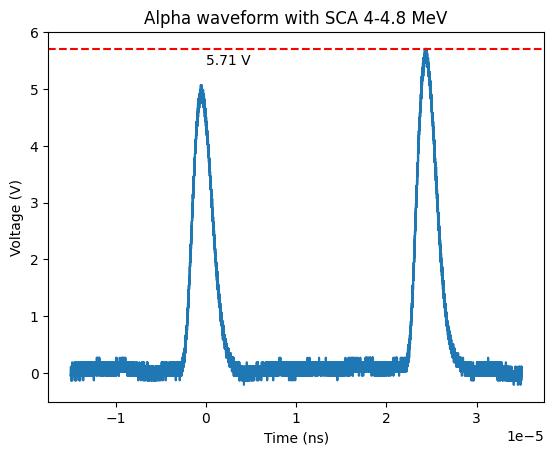

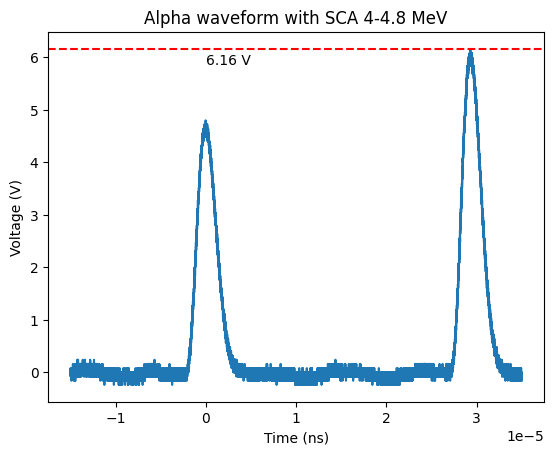

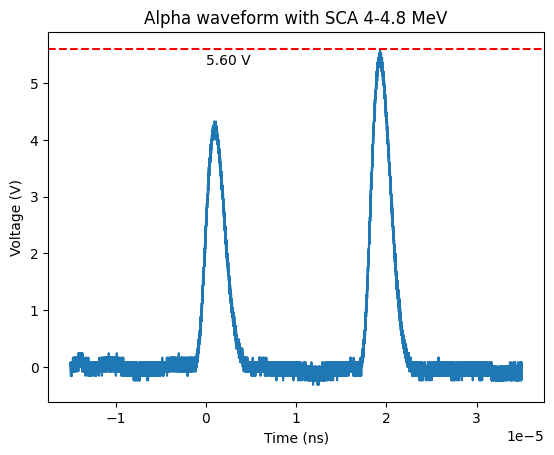

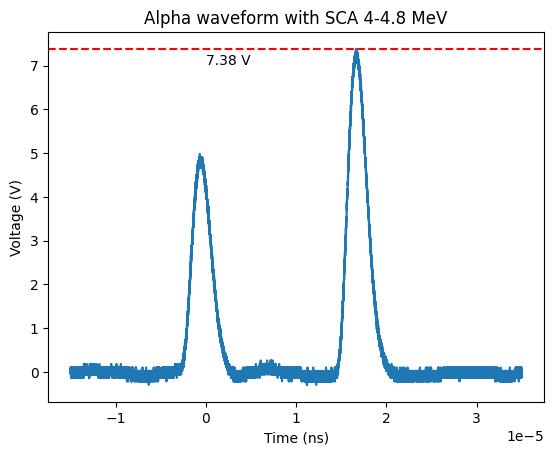

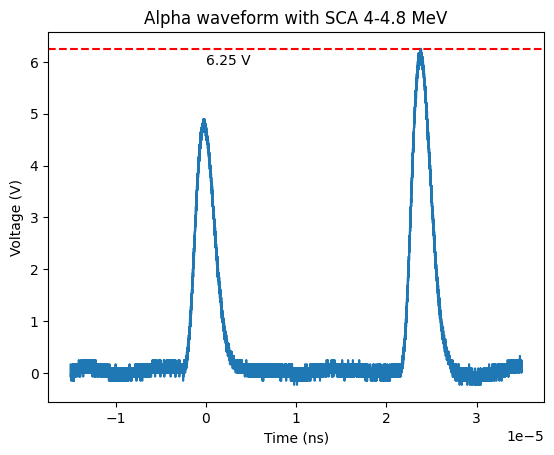

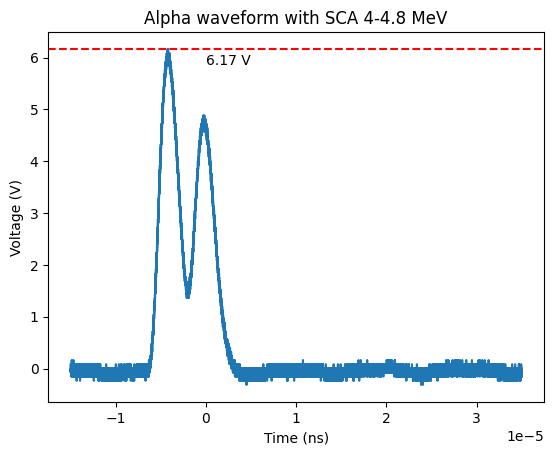

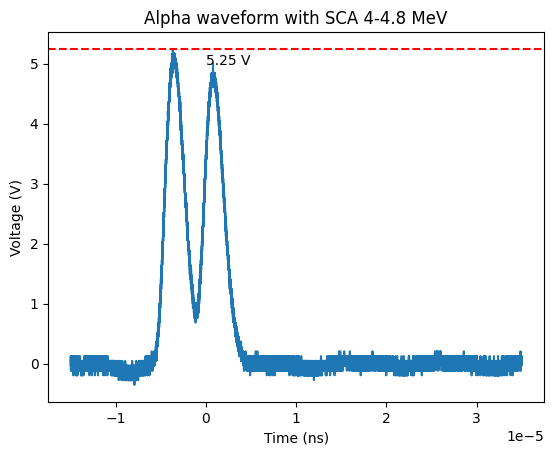

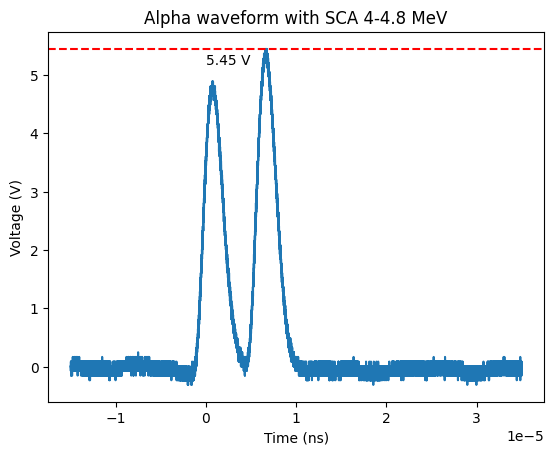

In [53]:
for f in files4:
    wf = wfm2read(f)
    Vm, t = wf[0], wf[1]
    for V in Vm:
        V = V - get_baseline(V)
        if V.max() > 5.2:
            plt.plot(t, V)
            plt.axhline(y=V.max(), color='r', linestyle='--')
            plt.text(s=f'{V.max():.2f} V', x=0, y=V.max()*0.95)
            plt.gca().set(xlabel='Time (ns)', ylabel='Voltage (V)', title='Alpha waveform with SCA 4-4.8 MeV')
            plt.show()
            break

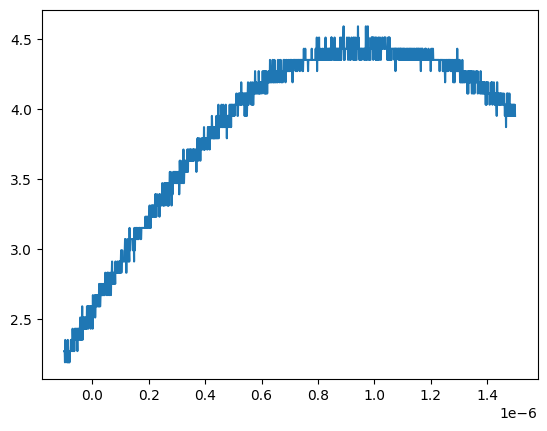

In [34]:
upoff = 1500
t0 = np.where(t == 0)[0][0]
V[t0], V.max(), V[t0-3:t0+3].max()
plt.plot(t[t0-100:t0+upoff], V[t0-100:t0+upoff])

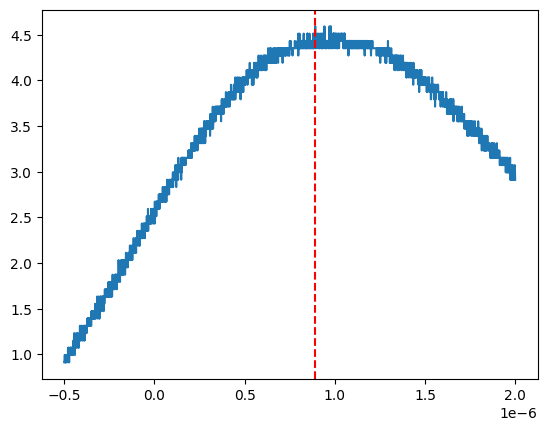

In [43]:
plt.plot(t[14_500:17_000], V[14_500:17_000])
Vp = V[14_500:17_000]
peak = Vp.max()
plt.axvline(x=t[np.where(V == peak)[0][0]], color='r', linestyle='--')


In [68]:
t_delay = []
for f in files4:
    wf = wfm2read(f)
    Vm, t = wf[0], wf[1]
    for V in Vm:
        V = V - get_baseline(V)
        t0 = np.where(t == 0)[0][0]
        t_delay.append(t[V.argmax()] - t0)

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 3.810e+02, 1.546e+03, 4.550e+02, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-15000.00001432, -15000.00001334, -15000.00001235, -15000.00001137,
        -15000.00001038, -15000.00000939, -15000.00000841, -15000.00000742,
        -15000.00000644, -15000.00000545, -15000.00000447, -15000.00000348,
        -15000.0000025 , -15000.00000151, -15000.00000052, -14999.99999954,
        -14999.99999855, -14999.99999757, -14999.99999658, -14999.999995

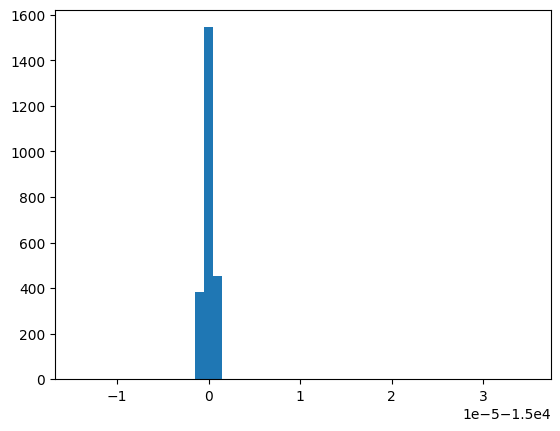

In [70]:
plt.hist(t_delay, bins=50)

In [73]:
45*0.3

13.5

# New version 

In [240]:
from RaTag.alphas.energy_map_reader import *

In [507]:
path = '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/FieldScan_Gate0100_Anode2000/*_Ch4.wfm'
files_alpha = sorted(glob(path))
files_alpha[3]

'/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/FieldScan_Gate0100_Anode2000/RUN18_20251104_Gate100_Anode2000_P2_13Wfm_Ch4.wfm'

In [532]:
path_bin = '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/**/'
ids, energies = bulk_load_all_chunks(path_bin)

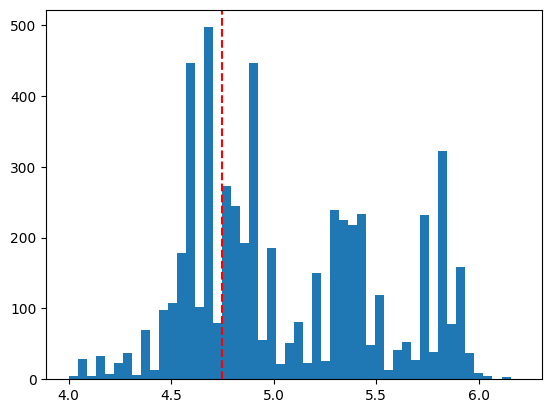

In [543]:
n, b, _ = plt.hist(energies, bins=50, range=(4, 6.2));
plt.axvline(x=4.75, color='r', linestyle='--', label='Ra-226')

In [ ]:
{'Th228': (4.0, 4.7),
 'Ra224': (4.7, 5.0),
 'Rn220': (5.2, 5.5),
 'Po216': (5.5, 6.0)}

27